In [1]:
import numpy as np
import pandas as pd
import boto3
import io 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")

In [2]:
ACCESS_KEY = ''
SECRET_KEY = ''
SESSION_TOKEN = ''

In [3]:
client = boto3.client(
    's3',
    aws_access_key_id=ACCESS_KEY,
    aws_secret_access_key=SECRET_KEY,
    aws_session_token=SESSION_TOKEN
)

In [4]:
def ler_csv(obj,col1,col2):
    df = pd.read_csv(io.BytesIO(obj['Body'].read()), encoding='utf8')
    df.columns = [col1,col2]
    return df

# a)

In [5]:
obj_2_a = client.get_object(Bucket='trab4-bucket',Key='datasets/questoes/2/a.csv/part-00000-b2cd40d6-3495-4656-8097-e4902c7ece8c-c000.csv')
df_2_a = ler_csv(obj_2_a,'palavra','contagem')
df_2_a

,palavra,contagem
0,tower,4184
1,eiffel,3246
2,there,2049
3,paris,1997
4,visit,1322
5,views,1239
6,tickets,1222
7,worth,1164
8,night,1107
9,tower.,1039


# b)

In [6]:
obj_2_b = client.get_object(Bucket='trab4-bucket',Key='datasets/questoes/2/b.csv/part-00000-176ebba3-14bd-40cb-b27f-8169cec6a7fe-c000.csv')
df_2_b = ler_csv(obj_2_b,'expressão','contagem')
df_2_b

,expressão,contagem
0,no trip to paris would be complete without a,3
1,you can't go to paris and not visit the eiffe,3
2,you can't go to paris without visiting the ei,3
3,no visit to paris would be complete without a,2
4,we got there first thing in the morning which,2
5,a trip to paris is not complete without a vis,2
6,you cannot go to paris without visiting the e,2
7,the eiffel tower is to paris what the statue,2
8,of liberty is to new york and what big ben is,2
9,well what can i say that hasn't already been,2


# c)

In [7]:
obj_2_c = client.get_object(Bucket='trab4-bucket',Key='datasets/questoes/2/c.csv/part-00000-126d5f5f-05fd-4460-93a9-f4362ac248f4-c000.csv')
df_2_c = ler_csv(obj_2_c,'expressão','contagem')
df_2_c

,expressão,contagem
0,must,687
1,paris,634
2,eiffel,579
3,tower,556
4,amazing,426
5,view,340
6,beautiful,322
7,great,317
8,night,288
9,visit,287


In [8]:
obj_2_d = client.get_object(Bucket='trab4-bucket',Key='datasets/questoes/2/d.csv/part-00000-4572b417-4c56-46c1-a665-23124de2f4ed-c000.csv')
df_2_d = ler_csv(obj_2_d,'data','contagem')
df_2_d['data'] = pd.to_datetime(df_2_d['data'])
df_2_d['ano'] = df_2_d['data'].dt.year
df_2_d.head()


,data,contagem,ano
0,2015-07-27,16,2015
1,2015-07-28,16,2015
2,2015-07-29,5,2015
3,2015-07-30,3,2015
4,2015-07-31,11,2015


In [9]:
df_2_d_2015 = df_2_d[df_2_d['ano'] == 2015]
df_2_d_2016 = df_2_d[df_2_d['ano'] == 2016]
df_2_d_2017 = df_2_d[df_2_d['ano'] == 2017]

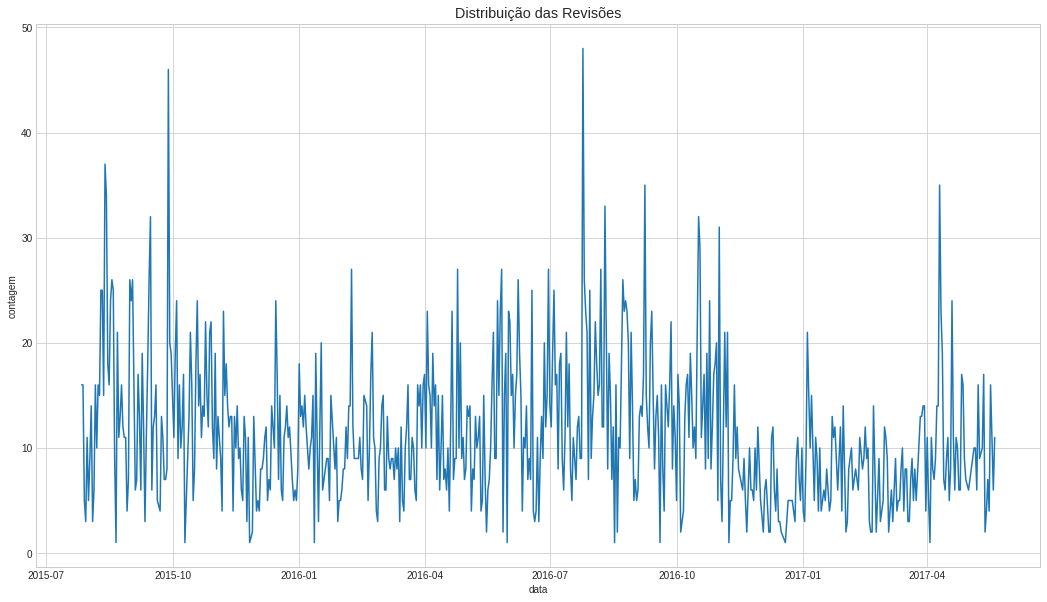

In [10]:
plt.figure(figsize=(18, 10))
plt.title("Distribuição das Revisões",size='x-large')
sns.lineplot(data = df_2_d, x = 'data', y = 'contagem')

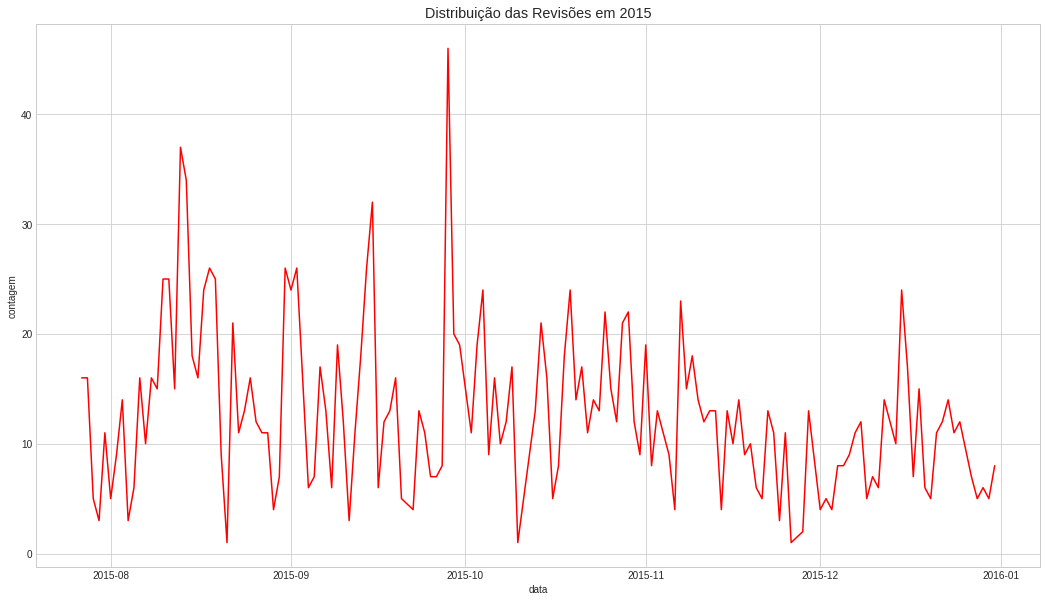

In [57]:
plt.figure(figsize=(18, 10))
plt.title("Distribuição das Revisões em 2015",size='x-large')
sns.lineplot(data = df_2_d_2015, x = 'data', y = 'contagem',color='red')

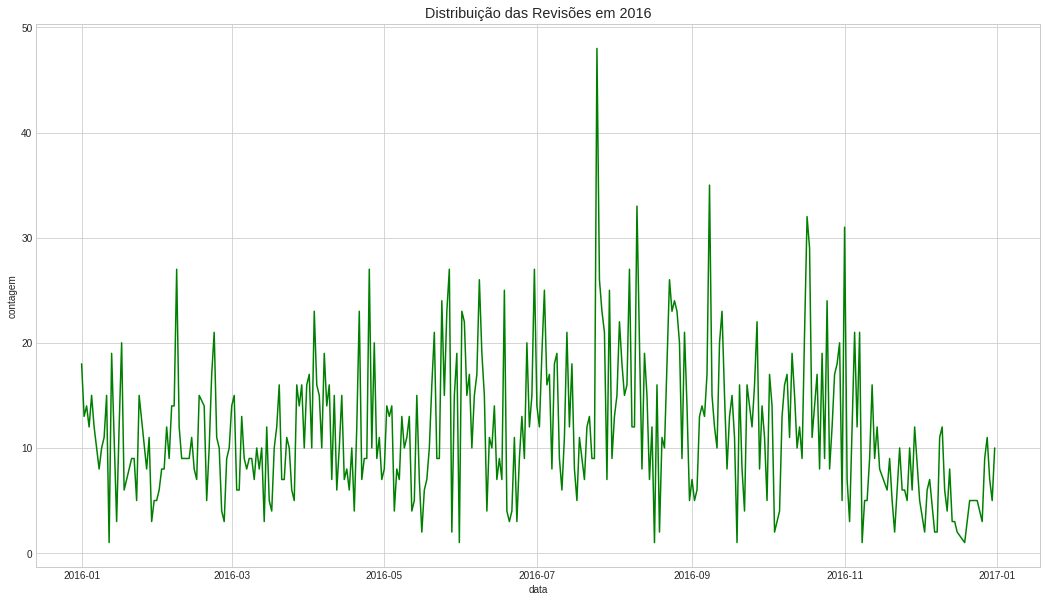

In [59]:
plt.figure(figsize=(18, 10))
plt.title("Distribuição das Revisões em 2016",size='x-large')
sns.lineplot(data = df_2_d_2016, x = 'data', y = 'contagem',color='green')

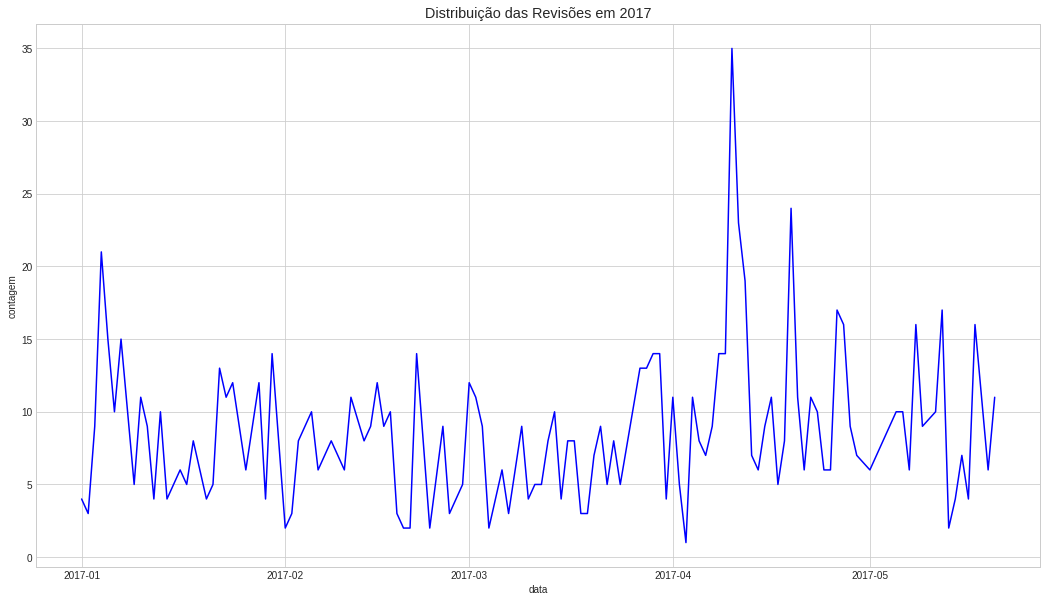

In [61]:
plt.figure(figsize=(18, 10))
plt.title("Distribuição das Revisões em 2017",size='x-large')
sns.lineplot(data = df_2_d_2017, x = 'data', y = 'contagem',color='blue')